# Análisis de Regresión para explicar la aceleración en una base de datos de vehículos

## Cristian F. Zapata
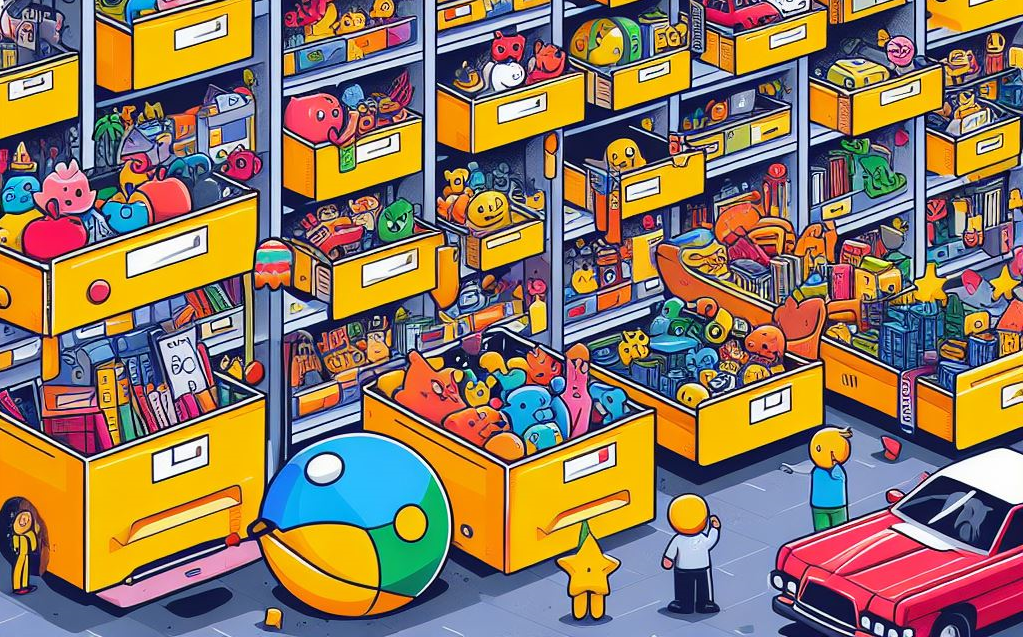

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

1	AMERICAN
2	EUROPEAN
3	JAPANESE

In [2]:
df = pd.read_csv(r"\Users\Admin\carros_datos.csv")

In [3]:
df.head()

Unnamed: 0  miles por galon  MOTOR  fuerza,caballos  peso,kg  acceleracion  \
0           1             18.0    307            130.0     3504            12   
1           2             15.0    350            165.0     3693            12   
2           3             18.0    318            150.0     3436            11   
3           4             16.0    304            150.0     3433            12   
4           5             17.0    302            140.0     3449            11   

   modelo,año  pais  numero de   
0          70   1.0         8.0  
1          70   1.0         8.0  
2          70   1.0         8.0  
3          70   1.0         8.0  
4          70   1.0         8.0

In [4]:
df.drop(columns = ["Unnamed: 0"],inplace=True)

In [5]:
df = df.rename(columns = {"miles por galon":"Consumo", "MOTOR":"Motor", "fuerza,caballos":"Caballos_fuerza", "peso,kg":"Peso(Kg)","acceleracion":"Aceleracion", "modelo,año":"Modelo", "pais":"Pais", "numero de ":"Numero_de_cilindros"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consumo              398 non-null    float64
 1   Motor                406 non-null    int64  
 2   Caballos_fuerza      400 non-null    float64
 3   Peso(Kg)             406 non-null    int64  
 4   Aceleracion          406 non-null    int64  
 5   Modelo               406 non-null    int64  
 6   Pais                 405 non-null    float64
 7   Numero_de_cilindros  405 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.5 KB


In [11]:
from ydata_profiling import ProfileReport  #(OJO)esta libreria y libreria y los graficos de seaborn no se llevan bien (Hay que ejecutar los grafico de seaborn antes que esta linea)
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

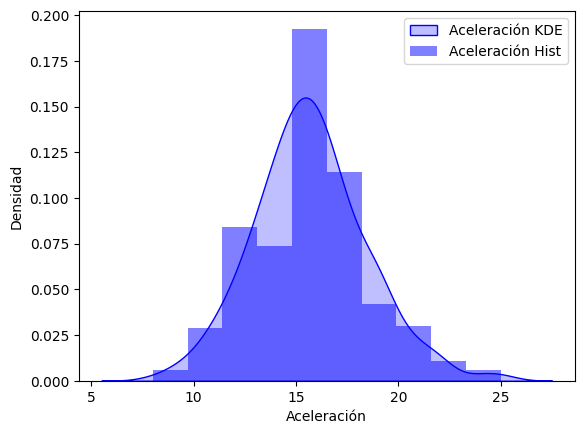

In [8]:
import scipy.stats as stats
# Crear histograma suavizado con Seaborn (Estimacion de kernel de densidad)
sns.kdeplot(df["Aceleracion"], label='Aceleración KDE', color='blue', fill=True)

# Crear histogramas normales con matplotlib
plt.hist(df["Aceleracion"], bins=10, alpha=0.5, label='Aceleración Hist', color='blue', density=True)


# Añadir etiquetas y leyenda
plt.xlabel('Aceleración')
plt.ylabel('Densidad')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

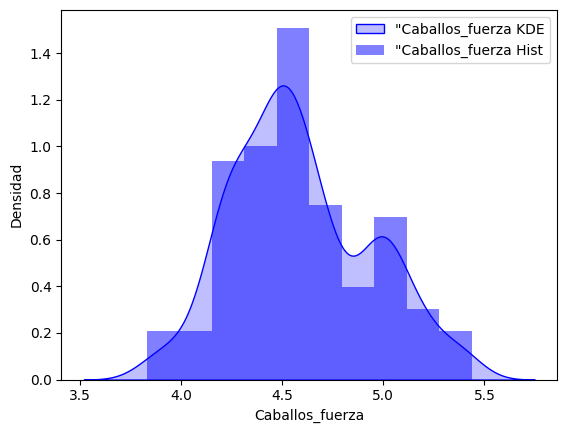

In [16]:
sns.kdeplot(df["Caballos_fuerza"], label='"Caballos_fuerza KDE', color='blue', fill=True)

# Crear histogramas normales con matplotlib
plt.hist(df["Caballos_fuerza"], bins=10, alpha=0.5, label='"Caballos_fuerza Hist', color='blue', density=True)


# Añadir etiquetas y leyenda
plt.xlabel("Caballos_fuerza")
plt.ylabel('Densidad')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

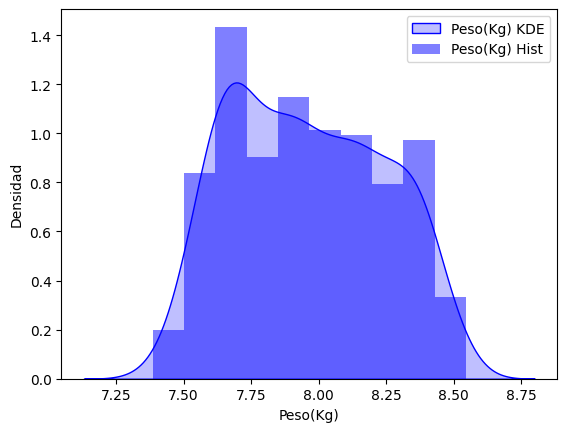

In [15]:
sns.kdeplot(df["Peso(Kg)"], label='Peso(Kg) KDE', color='blue', fill=True)

# Crear histogramas normales con matplotlib
plt.hist(df["Peso(Kg)"], bins=10, alpha=0.5, label='Peso(Kg) Hist', color='blue', density=True)


# Añadir etiquetas y leyenda
plt.xlabel("Peso(Kg)")
plt.ylabel('Densidad')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


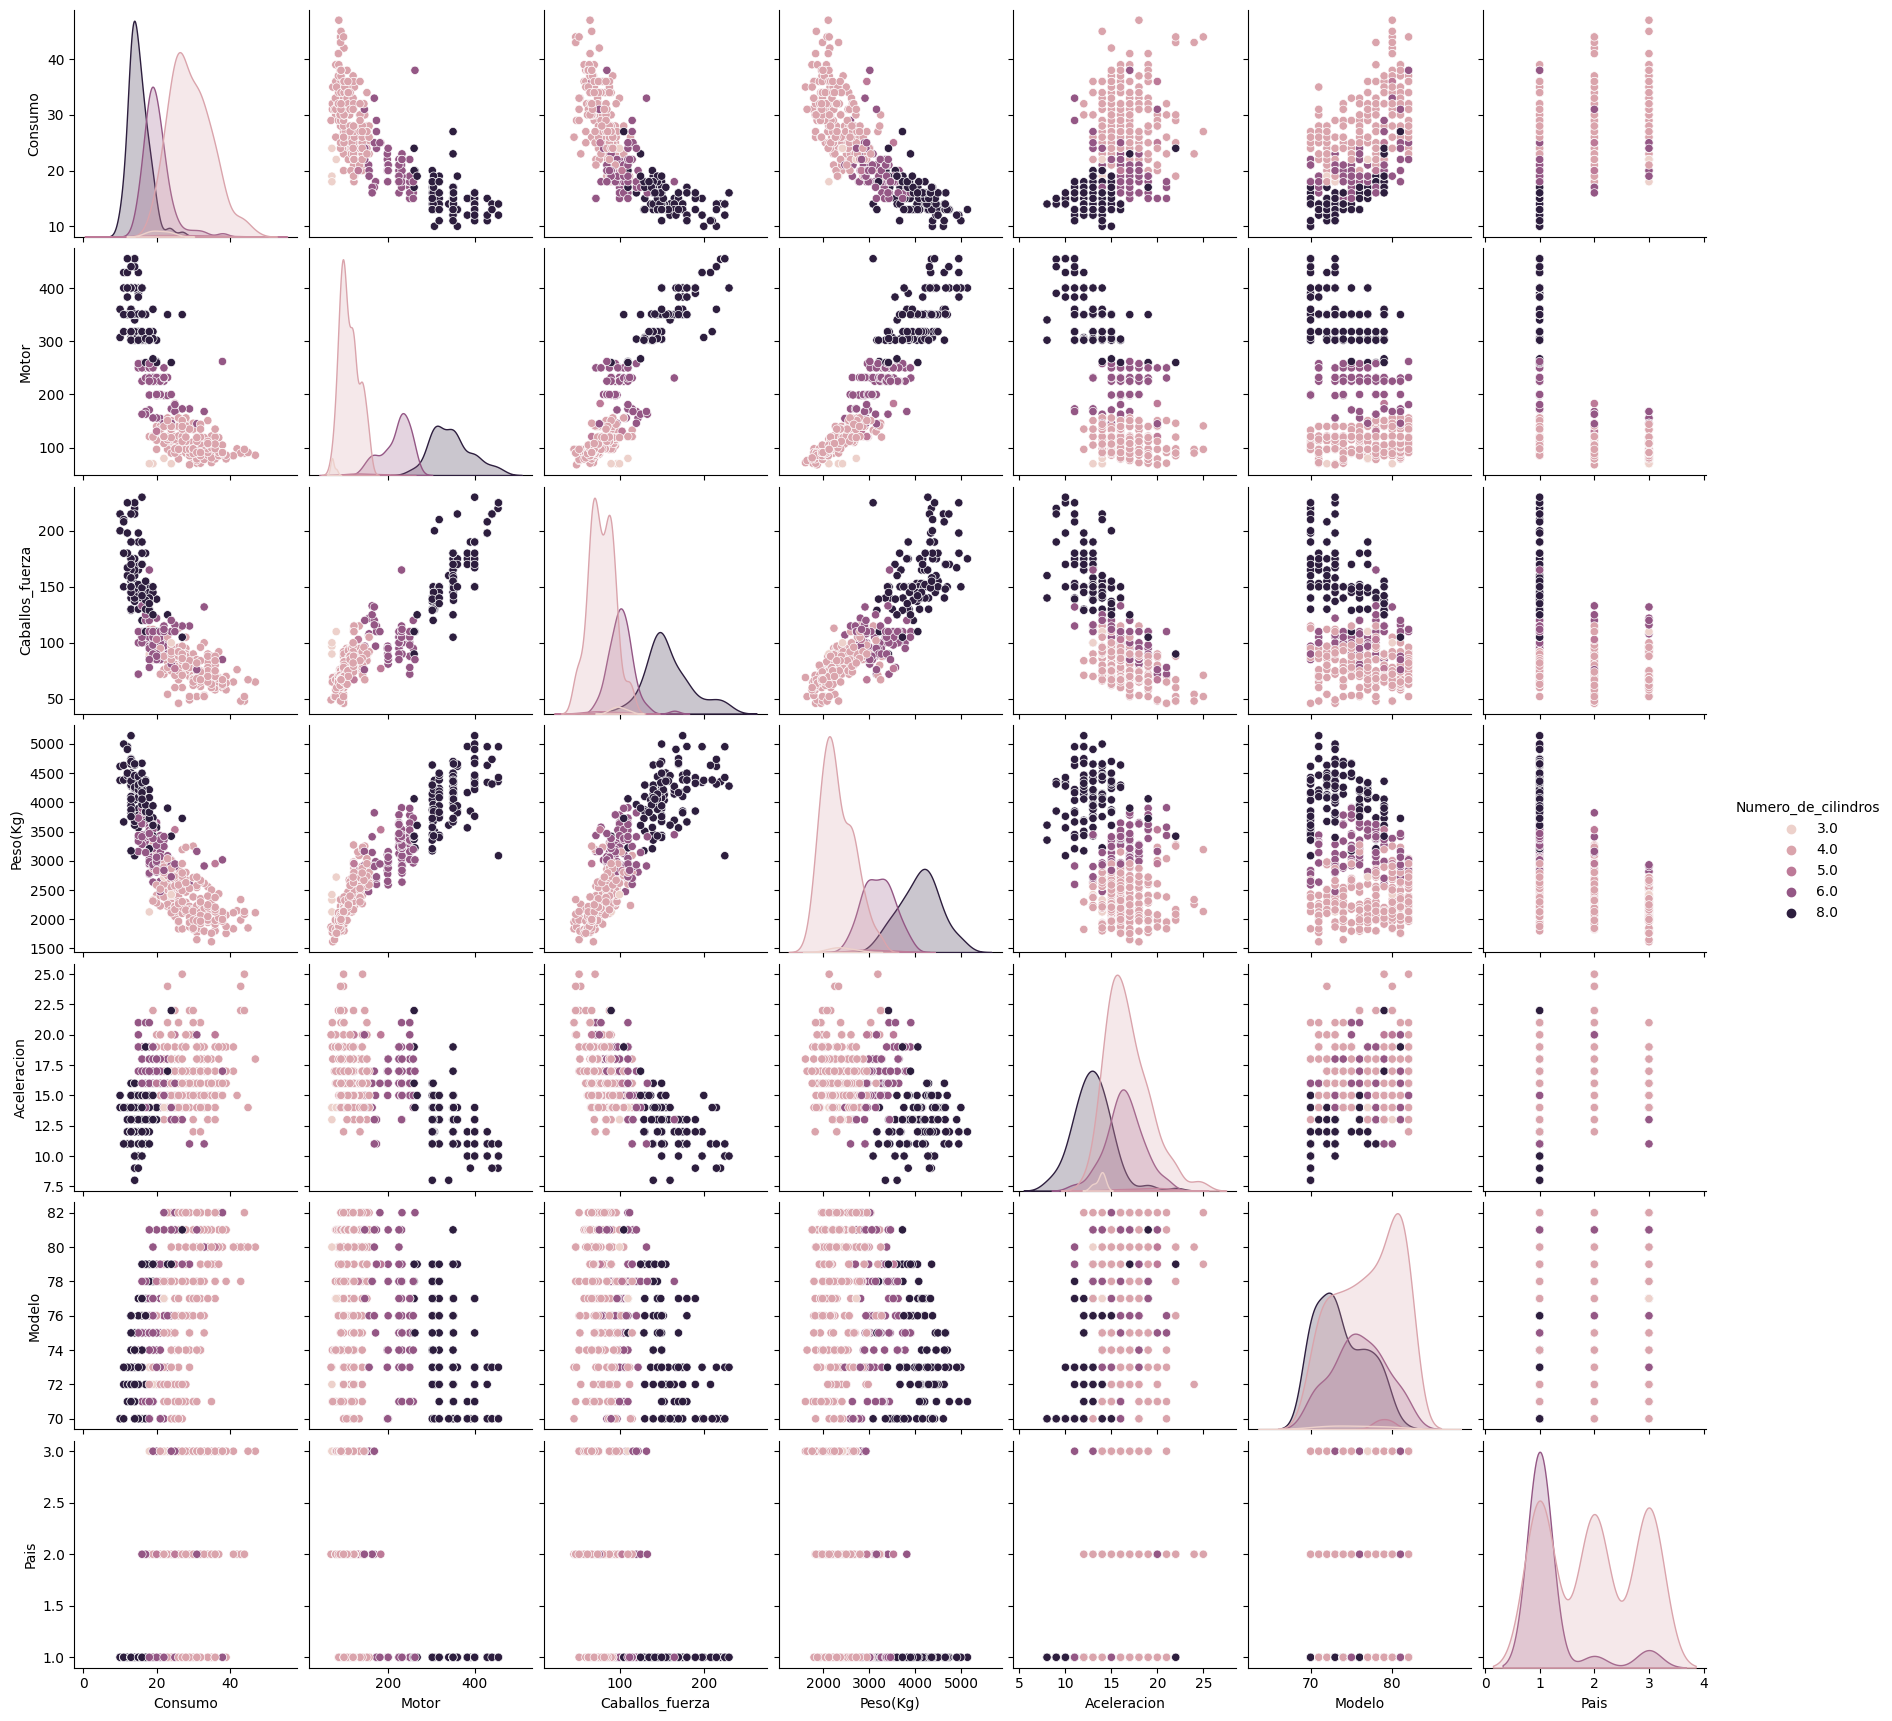

In [9]:
sns.pairplot(df, hue="Numero_de_cilindros")

In [7]:
#una funcion para transformar los datos
f=lambda x: np.log(x)

# Seleccionar las columnas a las que se aplicará la función
columnas_a_aplicar = [ "Consumo","Motor","Caballos_fuerza","Peso(Kg)","Aceleracion" ]

# Aplicar la función solo a las columnas seleccionadas
df[columnas_a_aplicar] = df[columnas_a_aplicar].apply(f)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


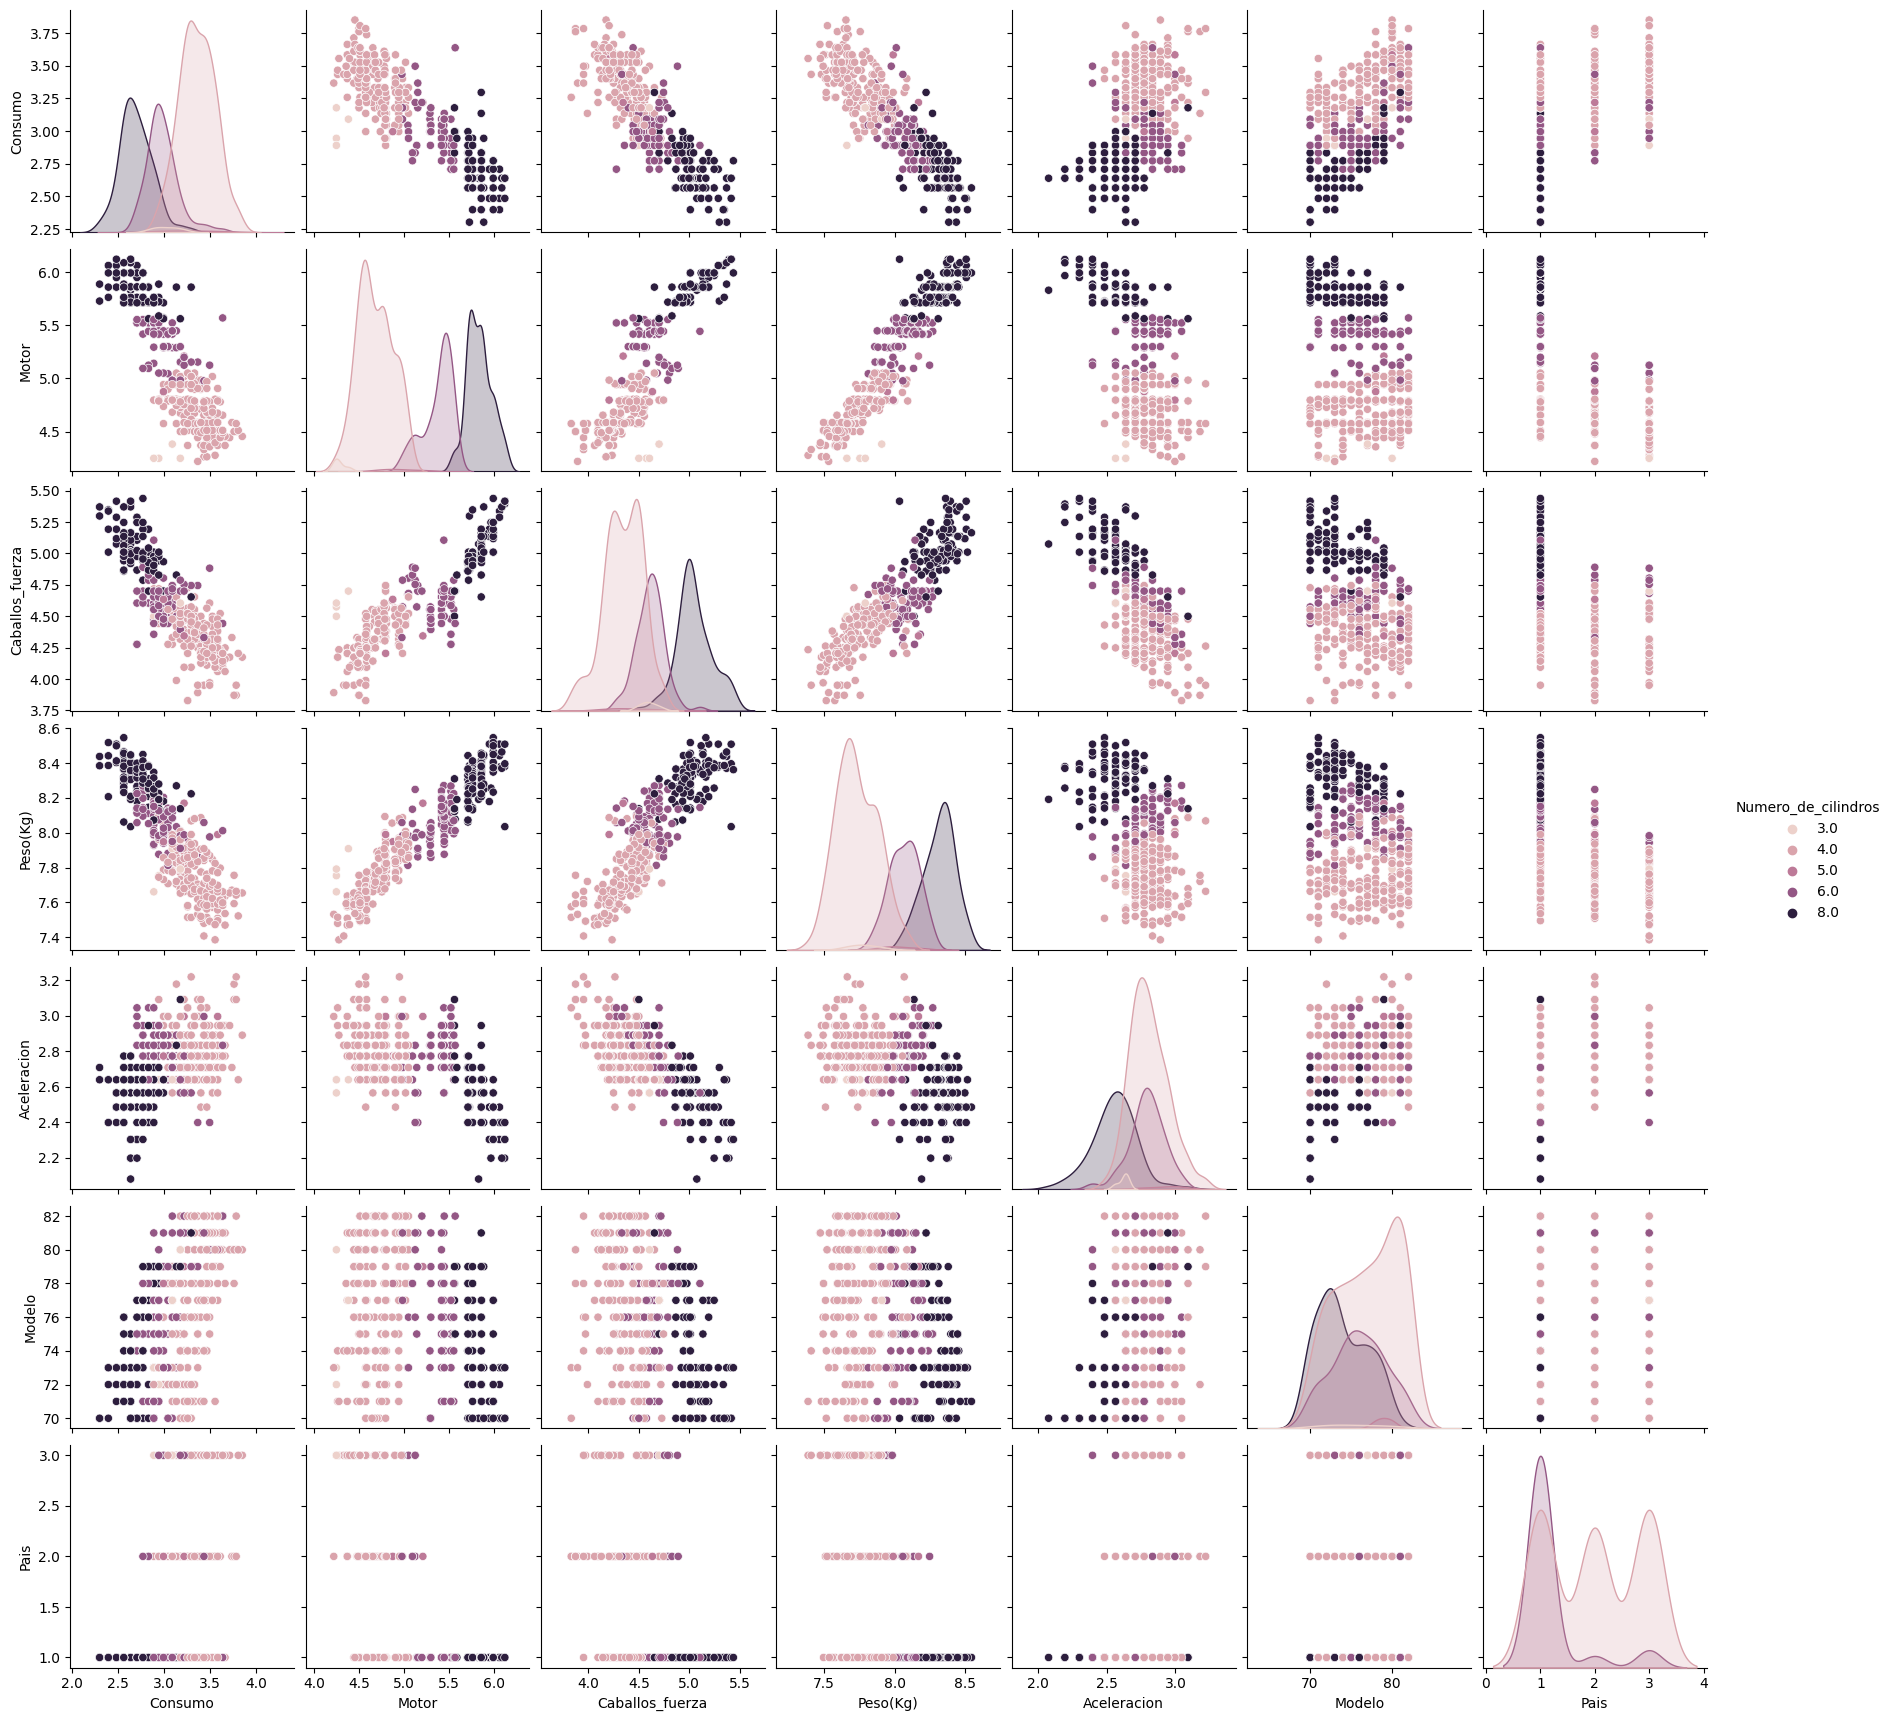

In [10]:
sns.pairplot(df, hue="Numero_de_cilindros")
plt.savefig('pargaf.png')

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 405
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consumo              391 non-null    float64
 1   Motor                391 non-null    float64
 2   Caballos_fuerza      391 non-null    float64
 3   Peso(Kg)             391 non-null    float64
 4   Aceleracion          391 non-null    float64
 5   Modelo               391 non-null    int64  
 6   Pais                 391 non-null    float64
 7   Numero_de_cilindros  391 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 27.5 KB


In [9]:
import statsmodels.api as sm

# Variables independientes (X)
X = df[["Consumo", "Motor" , "Caballos_fuerza" , "Peso(Kg)", "Modelo" , "Pais" , "Numero_de_cilindros"]]

# Variable dependiente (y)
y = df["Aceleracion" ]


# Agregar una constante al conjunto de datos (intercepto)
X_with_intercept = sm.add_constant(X)

# Crear y entrenar el modelo de regresión lineal usando statsmodels
modelo_statsmodels = sm.OLS(y, X_with_intercept).fit()

# Imprimir el resumen del modelo que incluye la prueba F
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Aceleracion   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          5.84e-105
Time:                        12:06:31   Log-Likelihood:                 374.39
No. Observations:                 391   AIC:                            -732.8
Df Residuals:                     383   BIC:                            -701.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5356    

El valor del coeficiente de determinación \( R^2 \) oscila entre 0 y 1, donde:

- 0 significa que el modelo no explica ninguna variabilidad en la variable dependiente.
- 1 significa que el modelo explica toda la variabilidad en la variable dependiente.

Un \( R^2 \) de aproximadamente 0.731 indica que alrededor del 73.10% de la variabilidad en la variable dependiente puede explicarse por las variables independientes incluidas en tu modelo de regresión lineal. Esto sugiere un ajuste sólido del modelo a los datos.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns  # Asegúrate de que coincida con las columnas de X_with_intercept
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]
vif_data

Variable          VIF
0                const  8005.133103
1              Consumo     8.864578
2                Motor    23.245316
3      Caballos_fuerza     5.585722
4             Peso(Kg)    13.305065
5               Modelo     2.184163
6                 Pais     2.125679
7  Numero_de_cilindros     9.844109

In [13]:
# Variables independientes (X)
X = df[["Consumo", "Motor" , "Caballos_fuerza" , "Peso(Kg)",  "Numero_de_cilindros"]]


# Variable dependiente (y)
y = df["Aceleracion" ]


# Agregar una constante al conjunto de datos (intercepto)
X_with_intercept = sm.add_constant(X)

# Crear y entrenar el modelo de regresión lineal usando statsmodels
modelo_statsmodels = sm.OLS(y, X_with_intercept).fit()

# Imprimir el resumen del modelo que incluye la prueba F
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Aceleracion   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.89e-107
Time:                        22:51:16   Log-Likelihood:                 374.36
No. Observations:                 391   AIC:                            -736.7
Df Residuals:                     385   BIC:                            -712.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5517    

In [29]:
# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns  # Asegúrate de que coincida con las columnas de X_with_intercept
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]
vif_data

Variable          VIF
0                const  7200.653981
1              Consumo     4.920230
2                Motor    18.219269
3      Caballos_fuerza     5.193473
4             Peso(Kg)    10.939573
5  Numero_de_cilindros     9.247711

In [ ]:
sns.heatmap(glue, annot=True, linewidth=.5)

In [18]:
# Variables independientes (X)
X = df[["Consumo" , "Caballos_fuerza" , "Peso(Kg)",  "Numero_de_cilindros"]]

# Variable dependiente (y)
y = df["Aceleracion" ]


# Agregar una constante al conjunto de datos (intercepto)
X_with_intercept = sm.add_constant(X)

# Crear y entrenar el modelo de regresión lineal usando statsmodels
modelo_statsmodels = sm.OLS(y, X_with_intercept).fit()

# Imprimir el resumen del modelo que incluye la prueba F
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Aceleracion   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.21e-104
Time:                        14:48:38   Log-Likelihood:                 363.68
No. Observations:                 391   AIC:                            -717.4
Df Residuals:                     386   BIC:                            -697.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0353    

In [19]:
# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns  # Asegúrate de que coincida con las columnas de X_with_intercept
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]
vif_data

Variable          VIF
0                const  6717.886866
1              Consumo     4.903849
2      Caballos_fuerza     5.140569
3             Peso(Kg)     7.233477
4  Numero_de_cilindros     5.152710

In [20]:
# Variables independientes (X)
X = df[["Consumo" , "Caballos_fuerza" ,  "Numero_de_cilindros"]]

# Variable dependiente (y)
y = df["Aceleracion" ]


# Agregar una constante al conjunto de datos (intercepto)
X_with_intercept = sm.add_constant(X)

# Crear y entrenar el modelo de regresión lineal usando statsmodels
modelo_statsmodels = sm.OLS(y, X_with_intercept).fit()

# Imprimir el resumen del modelo que incluye la prueba F
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Aceleracion   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           5.25e-76
Time:                        14:49:41   Log-Likelihood:                 295.61
No. Observations:                 391   AIC:                            -583.2
Df Residuals:                     387   BIC:                            -567.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.4060    

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Crear el modelo de regresión aleatoria
black_box_model = RandomForestRegressor(random_state=123, max_depth=25, max_features=10, n_estimators=100, bootstrap=True)

# Entrenar el modelo
black_box_model.fit(X_train, y_train)

# Realizar predicciones
y_blackbox = black_box_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_blackbox)
print(f"Error cuadrático medio: {mse}")


# Calcular R cuadrado
r2 = r2_score(y_test, y_blackbox)

# Imprimir el resultado
print(f"R cuadrado: {r2}")

Error cuadrático medio: 0.008302595268887472
R cuadrado: 0.7962591436261515
